# Composite 

*State of the Interactomes: an evaluation of molecular networks for generating biological insights.* Wright, SN et al. [https://doi.org/10.1101/2024.04.26.587073]  
This notebook contains code and results related to:
* Figure 4B-D

**Note: due to the size of network data sets utilized in this study, this notebook draws on summarized results rather than re-evaluating all networks directly.**

## Setup

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from neteval.network_statistics import NetworkStats, load_network_names
from neteval.gene_set_recovery_results import *

In [3]:
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams.update({'font.size': 7})
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams['hatch.linewidth'] = 0.5
plt.rcParams['xtick.major.width'] = 0.4
plt.rcParams['ytick.major.width'] = 0.4
plt.rcParams['xtick.minor.width'] = 0.3
plt.rcParams['ytick.minor.width'] = 0.3
plt.rcParams['legend.frameon'] = False
plt.rcParams['xtick.major.size'] = 3
plt.rcParams['ytick.major.size'] = 3
plt.rcParams['xtick.minor.size'] = 2
plt.rcParams['ytick.minor.size'] = 2
plt.rcParams['xtick.major.pad'] = 1
plt.rcParams['ytick.major.pad'] = 1
plt.rcParams['axes.labelpad'] = 1
plt.rcParams['patch.linewidth'] = 0.25

In [4]:
gitdir = os.path.expanduser('~/Git/Network_Evaluation_Tools/')
figdir = os.path.join(gitdir, 'StateOfTheInteractomes_Notebooks/Figures/')
evaldir = os.path.join(gitdir, 'Data/example_outputs/')
datadir = os.path.join(gitdir, 'Data/')
network_names = load_network_names(os.path.join(gitdir, 'StateOfTheInteractomes_Notebooks/Data/network_names_final.txt'))
genesets = [ 'gwas', 'disgen', 'gwas_230727', 'exp_genesets']
geneset_names = {'gwas' : 'Genetic', 
                'disgen':'Literature',
                'gwas_230727':'Genetic 2023+',
                'exp_genesets':'Experimental'}

## Example Analysis

Composites formed from DIP, PID2 and Wan only. 

In [1]:
test_composites = ['test_global__composite_min2', 'test_global__composite_min3', 'test_ranked_2__composite_min2', 'test_ranked_3__composite_min2']

In [7]:
stats = NetworkStats(test_composites, evaldir)

In [9]:
stats.network_node_counts

defaultdict(int,
            {'test_global__composite_min2': 1295,
             'test_global__composite_min3': 100,
             'test_ranked_2__composite_min2': 858,
             'test_ranked_3__composite_min2': 1295})

In [10]:
stats.network_edge_counts

defaultdict(int,
            {'test_global__composite_min2': 2105,
             'test_global__composite_min3': 110,
             'test_ranked_2__composite_min2': 1253,
             'test_ranked_3__composite_min2': 2105})

## Fig 4B - performance of series of global and ranked composite networks

In [53]:
performance_df = pd.read_csv(os.path.join(gitdir, 'StateOfTheInteractomes_Notebooks/Data/Fig4B_performance_results.csv'))

In [54]:
comparison_results = performance_df[performance_df['Comparator']]
performance_df = performance_df[~performance_df['Comparator']]

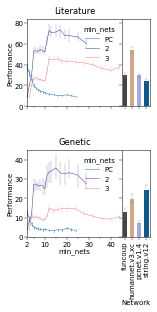

In [72]:
genesets = ['Literature', 'Genetic', 'Genetic 2023+', 'Experimental']
_, [[ax3, ax3a], [ax5, ax5a]] = plt.subplots(nrows=2, ncols=2, figsize=(2.2, 4), 
                gridspec_kw={'wspace':0, 'hspace':0.5, 'width_ratios':[1, 0.3]}, sharey='row', sharex='col')


for i, ax in enumerate([ax3, ax5]):
    a = comparison_results[comparison_results['GeneSet']==genesets[i]].pivot(index='index', columns='Network', values='Performance')
    sns.barplot(a, estimator='median', ax=[ax3a, ax5a][i],errorbar=('ci', 95),err_kws={'linewidth': 0.25, 'color':'grey'}, capsize=0.4, linewidth=0.5, width=0.6, 
                palette=['#444444', '#d1a786','#a3acd8', '#0e588b'], fill=True, saturation=1)#edgecolor='k
    sns.lineplot(data=performance_df[(performance_df.method=='PC') & (performance_df.GeneSet==genesets[i])], x='min_nets', y='Performance', hue='method',linewidth=0.5, ax=ax, err_style='bars', err_kws={'linewidth':0.5}, estimator='median')
    if 'OC' in performance_df.method.unique():
        sns.lineplot(data=performance_df[(performance_df.method=='OC') & (performance_df.GeneSet==genesets[i])], x='num_nets', y='Performance', hue='min_nets', ax=ax, err_style='bars', 
                    hue_order=[2,3], palette = [ 'darkslateblue', 'lightcoral'], linewidth=0.5, err_kws={'linewidth':0.25}, estimator='median')
    ax.set_title(genesets[i])
    _ = ax.set_xticks([2, 10,20,30,40])
    _ = ax.set_xticks([5, 15,25,35], minor=True)
    ax.set_xlim(2, 45)
    
    [ax3a, ax5a][i].tick_params(axis='x', rotation=90)
ax3.set_xlabel('')
ax3a.set_xlabel('')
plt.savefig(figdir+'4B_composite_performance_1.jpg', dpi=300, bbox_inches='tight')

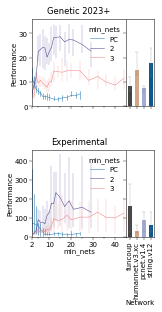

In [71]:
genesets = ['Literature', 'Genetic', 'Genetic 2023+', 'Experimental']
_, [[ax3, ax3a], [ax5, ax5a]] = plt.subplots(nrows=2, ncols=2, figsize=(2.2, 4), 
                gridspec_kw={'wspace':0, 'hspace':0.5, 'width_ratios':[1, 0.3]}, sharey='row', sharex='col')


for j, ax in enumerate([ax3, ax5]):
    i=j+2
    a = comparison_results[comparison_results['GeneSet']==genesets[i]].pivot(index='index', columns='Network', values='Performance')
    sns.barplot(a, estimator='median', ax=[ax3a, ax5a][j],errorbar=('ci', 95),err_kws={'linewidth': 0.25, 'color':'grey'}, capsize=0.4, linewidth=0.5, width=0.6, 
                palette=['#444444', '#d1a786','#a3acd8', '#0e588b'], fill=True, saturation=1)#edgecolor='k
    sns.lineplot(data=performance_df[(performance_df.method=='PC') & (performance_df.GeneSet==genesets[i])], x='min_nets', y='Performance', hue='method',linewidth=0.5, ax=ax, err_style='bars', err_kws={'linewidth':0.5}, estimator='median')
    if 'OC' in performance_df.method.unique():
        sns.lineplot(data=performance_df[(performance_df.method=='OC') & (performance_df.GeneSet==genesets[i])], x='num_nets', y='Performance', hue='min_nets', ax=ax, err_style='bars', 
                    hue_order=[2,3], palette = [ 'darkslateblue', 'lightcoral'], linewidth=0.5, err_kws={'linewidth':0.25}, estimator='median')
    ax.set_title(genesets[i].split('_a64_')[0])
    _ = ax.set_xticks([2, 10,20,30,40])
    _ = ax.set_xticks([5, 15,25,35], minor=True)
    ax.set_xlim(2, 45)
    
    [ax3a, ax5a][j].tick_params(axis='x', rotation=90)
ax3.set_xlabel('')
ax3a.set_xlabel('')
plt.savefig(figdir+'4B_composite_performance_2.jpg', dpi=300, bbox_inches='tight')

## Fig 4C - Performance of citation free ranked composite networks

In [61]:
nocite_df = pd.read_csv(os.path.join(gitdir, 'StateOfTheInteractomes_Notebooks/Data/Fig4C_performance_results.csv'))

In [62]:
nc_comparison_results = nocite_df[nocite_df['Comparator']]
nc_performance_df = nocite_df[~nocite_df['Comparator']]

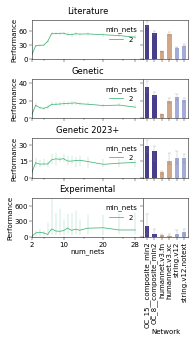

In [70]:
_, [[ax1, ax2], [ax3, ax4], [ax5, ax6], [ax7, ax8]] = plt.subplots(nrows=4, ncols=2, figsize=(2.8,4),
                                        gridspec_kw={'wspace':0, 'hspace':0.5, 'width_ratios':[1, 0.4]}, sharey='row', sharex='col')
for j, ax in enumerate([ax1, ax3, ax5, ax7]):
    i=j
    a = nc_comparison_results[nc_comparison_results['GeneSet']==genesets[i]].pivot(index='index', columns='Network', values='Performance')
    sns.barplot(a, estimator='median', ax=[ax2,ax4, ax6, ax8][j],errorbar=('ci', 95),err_kws={'linewidth': 0.25, 'color':'grey'}, capsize=0.4,  linewidth=0.25, width=0.6, 
                    palette=['darkslateblue', 'darkslateblue','#d1a786', '#d1a786','#a3acd8', '#a3acd8'], fill=True, saturation=1)
    
    gs = genesets[i]
    sns.lineplot(data=nc_performance_df[nc_performance_df.GeneSet==gs], x='num_nets', y='Performance', hue='min_nets', ax=ax, err_style='bars', 
            hue_order=[2], palette = [ 'mediumseagreen'], linewidth=0.75, err_kws={'linewidth':0.25}, estimator='median')
    ax.set_title(gs.split('_a64_')[0])
    [ax2, ax4, ax6, ax8][j].tick_params(axis='x', rotation=90)
    ax.set_title(gs.split('_a64_')[0])
    _ = ax.set_xticks([2, 10,20,28])
    _ = ax.set_xticks([5, 15,25,28], minor=True)
    ax.set_xlim(2, 30)

ax1.set_yticks([0,30,60])
ax3.set_yticks([0,20,40])
ax5.set_yticks([0,15,30])
ax7.set_yticks([0,300,600])

plt.savefig(figdir+'4C_citation_free_performance.jpg', dpi=300, bbox_inches='tight')

## Fig 4D - Sizes of composite networks

In [103]:
sizes_df = pd.read_csv(os.path.join(gitdir, 'StateOfTheInteractomes_Notebooks/Data/Fig4D_network_sizes.csv'), index_col=0)
sizes_df['Network'] = sizes_df.index

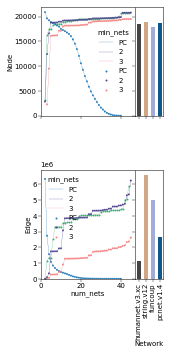

In [107]:
_, [[ ax2, ax2a], [ax4, ax4a]] = plt.subplots(nrows=2, ncols=2,figsize=(2.2, 5), 
        gridspec_kw={'wspace':0, 'hspace':0.5, 'width_ratios':[1, 0.3]}, sharey='row', sharex='col')

for i, metric in enumerate(['Node', 'Edge']):

    sns.lineplot(data=sizes_df[(sizes_df.method=='OC') & (sizes_df.min_nets==2) & (sizes_df.Group=='NOCITE')],ax=[ax2, ax4][i], y=metric, x='num_nets', linewidth=0.25, color='mediumseagreen')
    sns.lineplot(data =sizes_df[(sizes_df.method=='PC')& (sizes_df.Group=='ALL')], x='min_nets', y=metric, hue='method', ax=[ax2, ax4][i] , linewidth=0.25)
    sns.lineplot(data =sizes_df[(sizes_df.method=='OC') & (sizes_df.min_nets>1)& (sizes_df.Group=='ALL')], x='num_nets', y=metric, hue='min_nets', ax=[ax2, ax4][i], hue_order=[2,3], 
                palette = [ 'darkslateblue', 'lightcoral'], linewidth=0.25)

    sns.scatterplot(data=sizes_df[(sizes_df.method=='OC') & (sizes_df.min_nets==2) & (sizes_df.Group=='NOCITE')],ax=[ax2, ax4][i], y=metric, x='num_nets', s=3, color='mediumseagreen', edgecolor=None)
    sns.scatterplot(data =sizes_df[(sizes_df.method=='PC')& (sizes_df.Group=='ALL')], x='min_nets', y=metric, hue='method', ax=[ax2, ax4][i], s=3, edgecolor=None)
    sns.scatterplot(data =sizes_df[(sizes_df.method=='OC') & (sizes_df.min_nets>1)& (sizes_df.Group=='ALL')], x='num_nets', y=metric, hue='min_nets', ax=[ax2, ax4][i], s=3, hue_order=[2,3], 
                palette = [ 'darkslateblue', 'lightcoral'], edgecolor=None)

    #ax1.set_yscale('log')

    sns.barplot(sizes_df[sizes_df['Comparator']].loc[:, (metric, 'Network')], x = 'Network', y=metric, hue='Network', ax= [ax2a, ax4a][i],linewidth=0.25, width=0.6, 
                palette=['#444444', '#d1a786','#a3acd8', '#0e588b'], fill=True, saturation=1)

ax4a.tick_params(axis='x', rotation=90)
plt.savefig(figdir+'4D_network_sizes.jpg', dpi=300, bbox_inches='tight')